In [2]:
from importlib import reload

In [3]:
from pathlib import Path
from glob import glob

import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import convergence_plots as cp
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200 # bigger figures, yayy!

In [18]:
folder = Path(r"outputs/parametric/example_dg_burgess1D_hesthaven//")
df = pd.DataFrame()
for file in folder.glob("*.csv"):
    df = df.append(
        cp.calculate_num_order(pd.read_csv(file).assign(
            expid=file.name.split("r")[0].replace("_", "")))
    )
df["h-2"] = 1/df["h"]**2
df["gel"] = df["gel"].map(cp.gel_names)

print("order:")
print(df["order"].unique())
print("gel:")
print(df["gel"].unique())
print("diffcoef:")
print(df["diffcoef"].unique())
print("cw:")
print(df["cw"].unique())
print("cfl:")
print(df["cfl"].unique())


order:
[0. 1. 2. 3. 4.]
gel:
['']
diffcoef:
[0.001 0.01 ]
cw:
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]
cfl:
[0.001 0.01 ]


In [8]:
df.columns

Index(['Unnamed: 0', 'h', 'n_cells', 'mean_vol', 'order', 'n_dof', 'ana_l2',
       'diff_l2', 'err_rel', 'elapsed', 'cour', 'actual_dt', 'nls_error',
       'nls_iter', 'num_order', 'adflux', 'limit', 'cw', 'diffcoef',
       'diffscheme', 'cfl', 'dt', 'gel', 'expid', 'h-2'],
      dtype='object')

In [9]:
df[df["nls_iter"] > 1][['h', 'n_cells', 'mean_vol', 'order', 'n_dof',
           'diff_l2', 'err_rel', 'num_order', 'cw', 'diffcoef',
           'nls_error',
           'nls_iter',
           'gel', 'expid', 'h-2']]

h  n_cells  mean_vol  order    n_dof       diff_l2       err_rel  \
23  0.448048   1024.0  0.050545    4.0  15360.0  1.805321e-07  2.232120e-07   
24  0.316439   4096.0  0.025211    4.0  61440.0  1.154143e-07  1.426996e-07   

    num_order        cw  diffcoef     nls_error  nls_iter        gel  \
23   4.475656  100000.0      0.01  9.901700e-10       2.0  Triangles   
24   0.643214  100000.0      0.01  1.948283e-09       2.0  Triangles   

            expid       h-2  
23  0005300000010  4.981398  
24  0005300000010  9.986658

## Whole dataframe

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[['h', 'n_cells', 'mean_vol', 'order', 'n_dof',
                'diff_l2', 'err_rel', 
#               'cour', 'actual_dt', 
                'num_order', 'cw', 'diffcoef',
#               'cfl', 'dt', 
                'limit',
                'gel', 'expid', 'h-2']])

h  n_cells  mean_vol  order  n_dof   diff_l2   err_rel  num_order  \
0   1.000      2.0     1.000    0.0    2.0  1.030272  0.420607        NaN   
1   0.500      4.0     0.500    0.0    4.0  0.630254  0.257320   0.709020   
2   0.250      8.0     0.250    0.0    8.0  0.472767  0.193069   0.414804   
3   0.125     16.0     0.125    0.0   16.0  0.338756  0.138348   0.480884   
4   1.000      2.0     1.000    1.0    4.0  0.500825  0.204461        NaN   
5   0.500      4.0     0.500    1.0    8.0  0.418864  0.171014   0.257824   
6   0.250      8.0     0.250    1.0   16.0  0.234363  0.095709   0.837737   
7   0.125     16.0     0.125    1.0   32.0  0.162866  0.066514   0.525061   
8   1.000      2.0     1.000    2.0    6.0  0.514968  0.210235        NaN   
9   0.500      4.0     0.500    2.0   12.0  0.438347  0.178968   0.232409   
10  0.250      8.0     0.250    2.0   24.0  0.221916  0.090626   0.982060   
11  0.125     16.0     0.125    2.0   48.0  0.154146  0.062953   0.525717   
12  1.000      2.0     1.000    3.0    8.0  0.409768  0.167287        NaN   
13  0.500      4.0     0.500    3.0   16.0  0.441160  0.180117  -0.106496   
14  0.250      8.0     0.250    3.0   32.0  0.222551  0.090885   0.987169   
15  0.125     16.0     0.125    3.0   64.0  0.154560  0.063122   0.525966   
16  1.000      2.0     1.000    4.0   10.0  0.362220  0.147876        NaN   
17  0.500      4.0     0.500    4.0   20.0  0.426361  0.174075  -0.235210   
18  0.250      8.0     0.250    4.0   40.0  0.223451  0.091253   0.932117   
19  0.125     16.0     0.125    4.0   80.0  0.155119  0.063350   0.526587   
0   1.000      2.0     1.000    0.0    2.0  1.030272  0.420607        NaN   
1   0.500      4.0     0.500    0.0    4.0  0.630254  0.257320   0.709020   
2   0.250      8.0     0.250    0.0    8.0  0.472767  0.193069   0.414804   
3   0.125     16.0     0.125    0.0   16.0  0.338756  0.138348   0.480884   
4   1.000      2.0     1.000    1.0    4.0  0.500825  0.204461        NaN   
5   0.500      4.0     0.500    1.0    8.0  0.313373  0.127944   0.676428   
6   0.250      8.0     0.250    1.0   16.0  0.216505  0.088416   0.533481   
7   0.125     16.0     0.125    1.0   32.0  0.149124  0.060902   0.537885   
8   1.000      2.0     1.000    2.0    6.0  0.514968  0.210235        NaN   
9   0.500      4.0     0.500    2.0   12.0  0.250837  0.102412   1.037731   
10  0.250      8.0     0.250    2.0   24.0  0.169292  0.069135   0.567240   
11  0.125     16.0     0.125    2.0   48.0  0.111981  0.045733   0.596253   
12  1.000      2.0     1.000    3.0    8.0  0.409768  0.167287        NaN   
13  0.500      4.0     0.500    3.0   16.0  0.268332  0.109554   0.610788   
14  0.250      8.0     0.250    3.0   32.0  0.177932  0.072664   0.592690   
15  0.125     16.0     0.125    3.0   64.0  0.109194  0.044595   0.704436   
16  1.000      2.0     1.000    4.0   10.0  0.362220  0.147876        NaN   
17  0.500      4.0     0.500    4.0   20.0  0.325210  0.132777   0.155496   
18  0.250      8.0     0.250    4.0   40.0  0.203698  0.083186   0.674941   
19  0.125     16.0     0.125    4.0   80.0  0.113603  0.046395   0.842434   
0   1.000      2.0     1.000    0.0    2.0  1.029352  0.420297        NaN   
1   0.500      4.0     0.500    0.0    4.0  0.615672  0.252184   0.741503   
2   0.250      8.0     0.250    0.0    8.0  0.453083  0.185590   0.442385   
3   0.125     16.0     0.125    0.0   16.0  0.310008  0.126984   0.547469   
4   1.000      2.0     1.000    1.0    4.0  0.497835  0.203272        NaN   
5   0.500      4.0     0.500    1.0    8.0  0.386857  0.158460   0.363865   
6   0.250      8.0     0.250    1.0   16.0  0.207187  0.084867   0.900867   
7   0.125     16.0     0.125    1.0   32.0  0.123036  0.050398   0.751850   
8   1.000      2.0     1.000    2.0    6.0  0.504672  0.206064        NaN   
9   0.500      4.0     0.500    2.0   12.0  0.379489  0.155442   0.411287   
10  0.250      8.0     0.250    2.0   24.0  0.198546  0.081328   0.934582   
11  

## Save dataframe

In [ ]:
out_df = df[['h', 'n_cells', 'mean_vol', 'order', 'n_dof',
           'diff_l2', 'err_rel', 'cour', 'actual_dt', 'num_order', 'cw', 'diffcoef',
           'cfl', 'dt', 'gel', 'expid', 'h-2']]

In [26]:
out_df.to_excel("laplace.xlsx")

## Aggregated advdiff, laplace

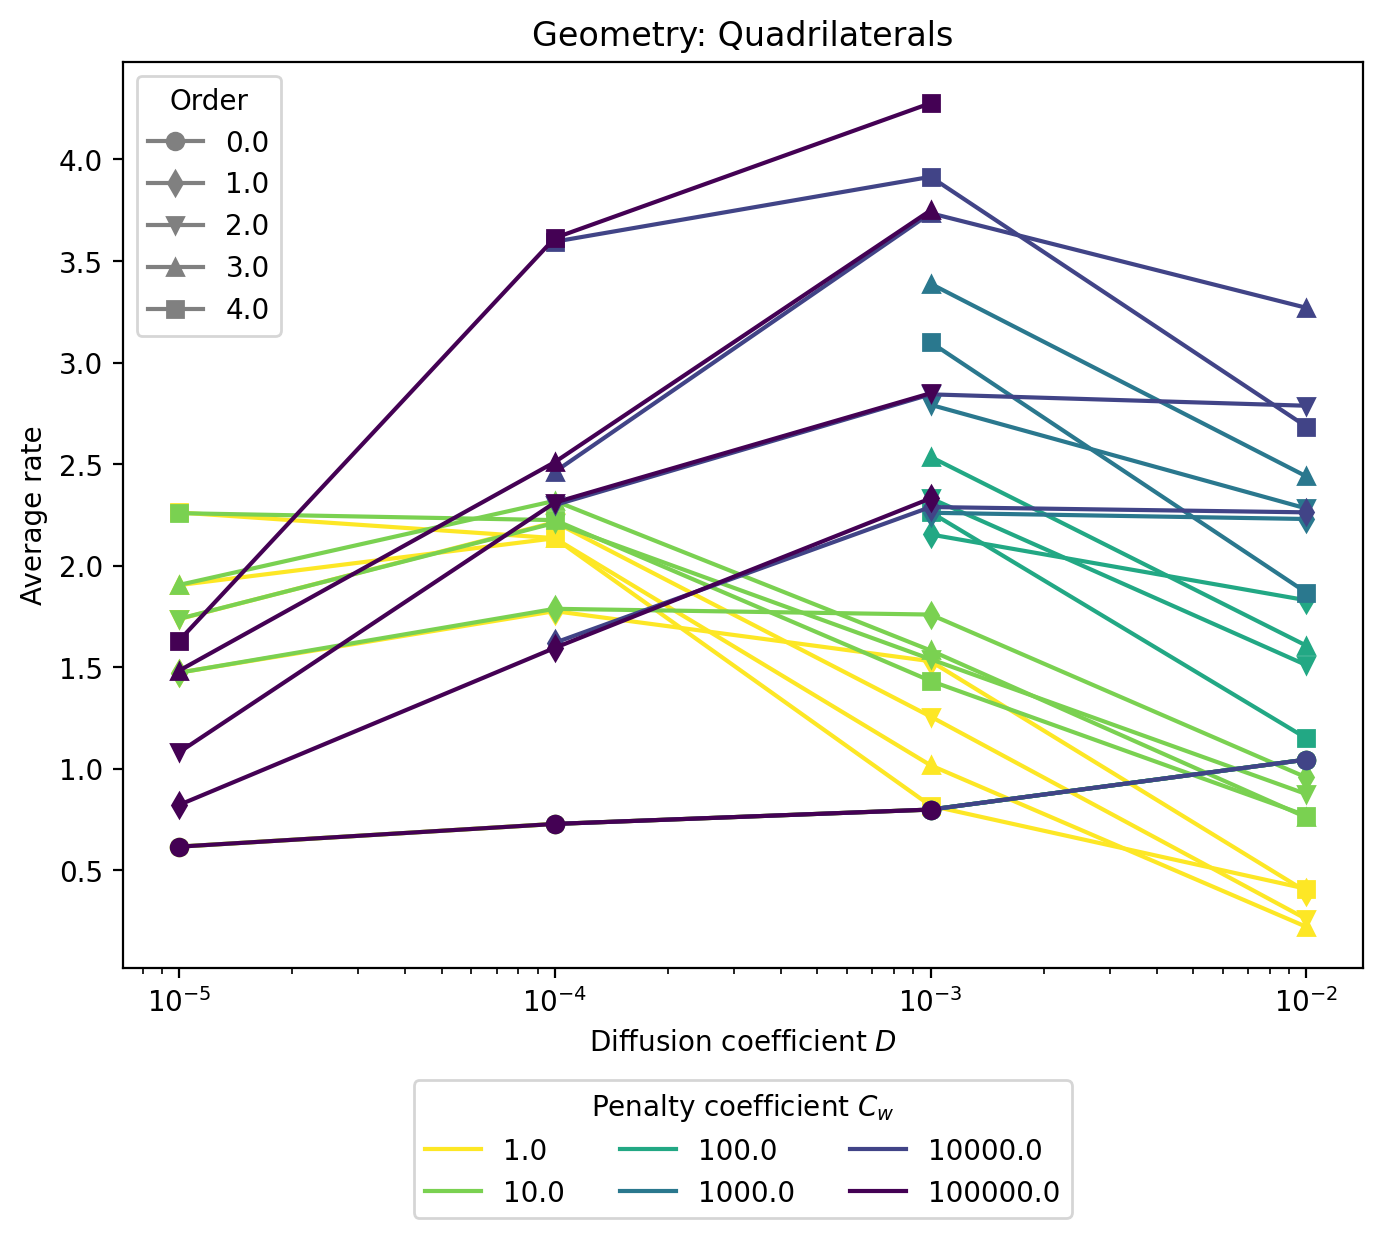

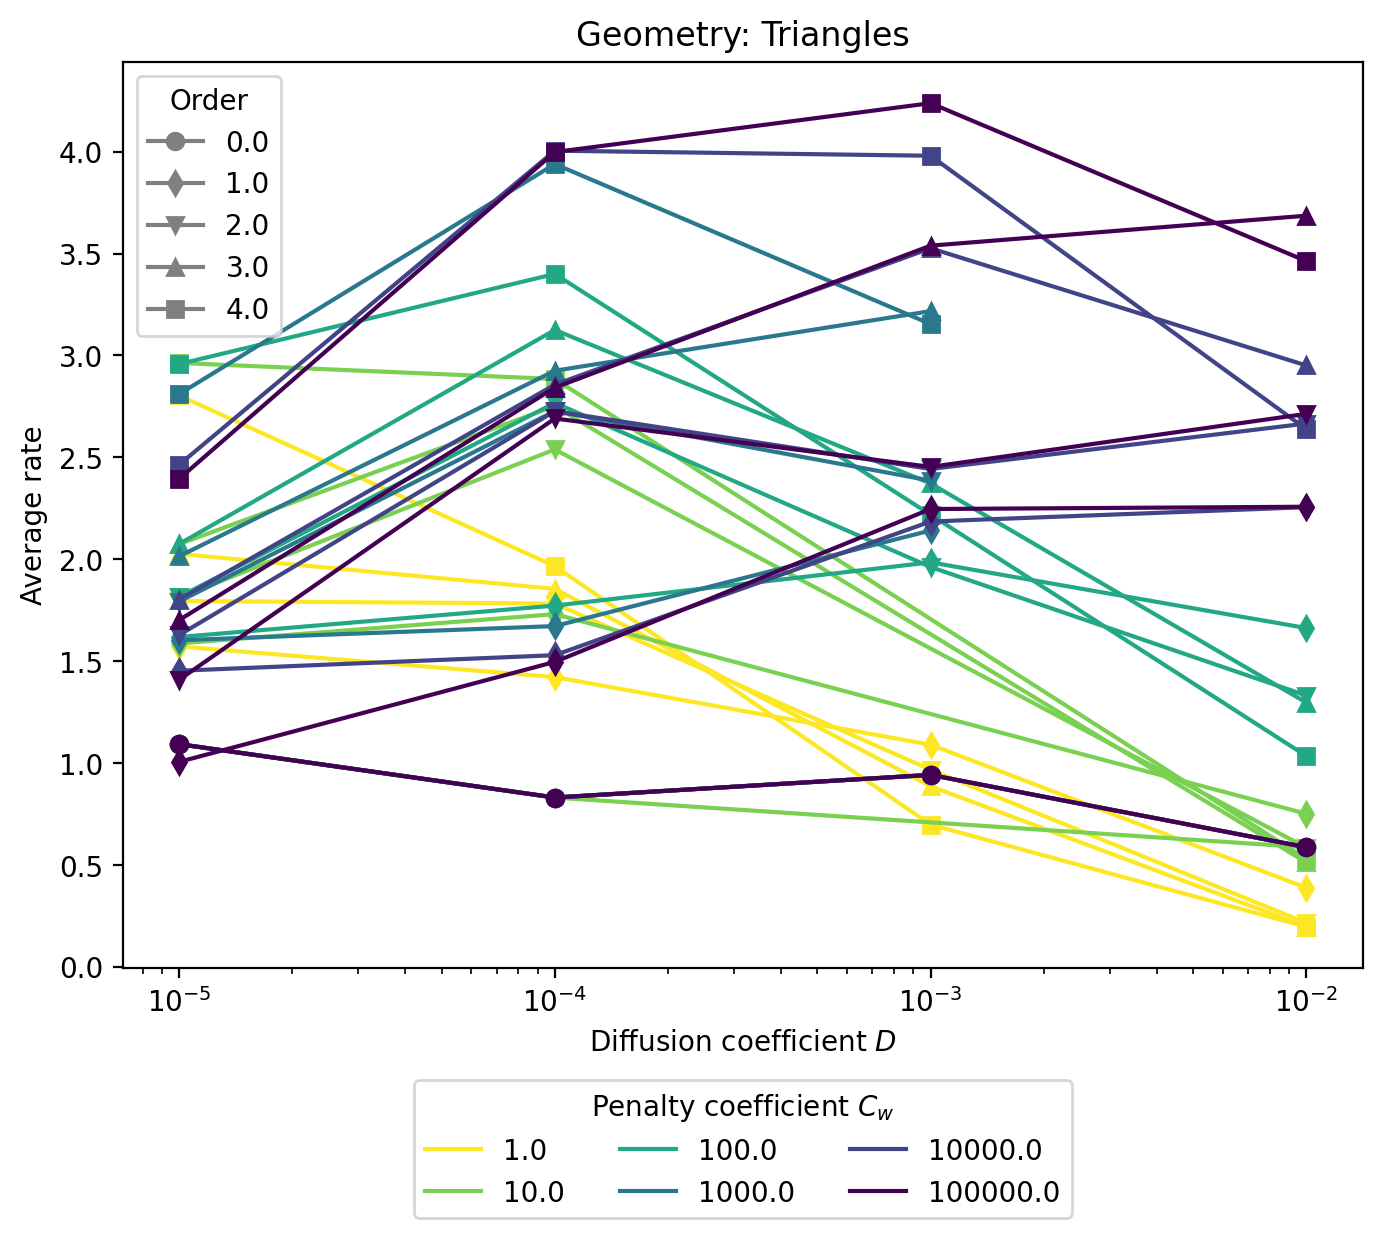

In [17]:
for gel in df["gel"].unique():
    fe = cp.plot_agregated_var(df[(df["gel"] == gel) 
                                  # & (df["num_order"] > 0) & (df["num_order"] < 6)
                                 ],
                            y_var="num_order", y_lab="Average rate", ylogscale=False,
                            x_var="diffcoef", x_lab="Diffusion coefficient $D$",
                            color_var="cw",
                            color_lab="Penalty coefficient $C_w$",
                            ax_title = f"Geometry: {gel}")
    #fe.savefig("nls_err_plot.pdf")

## Advdiff, laplace nad burgers 2D

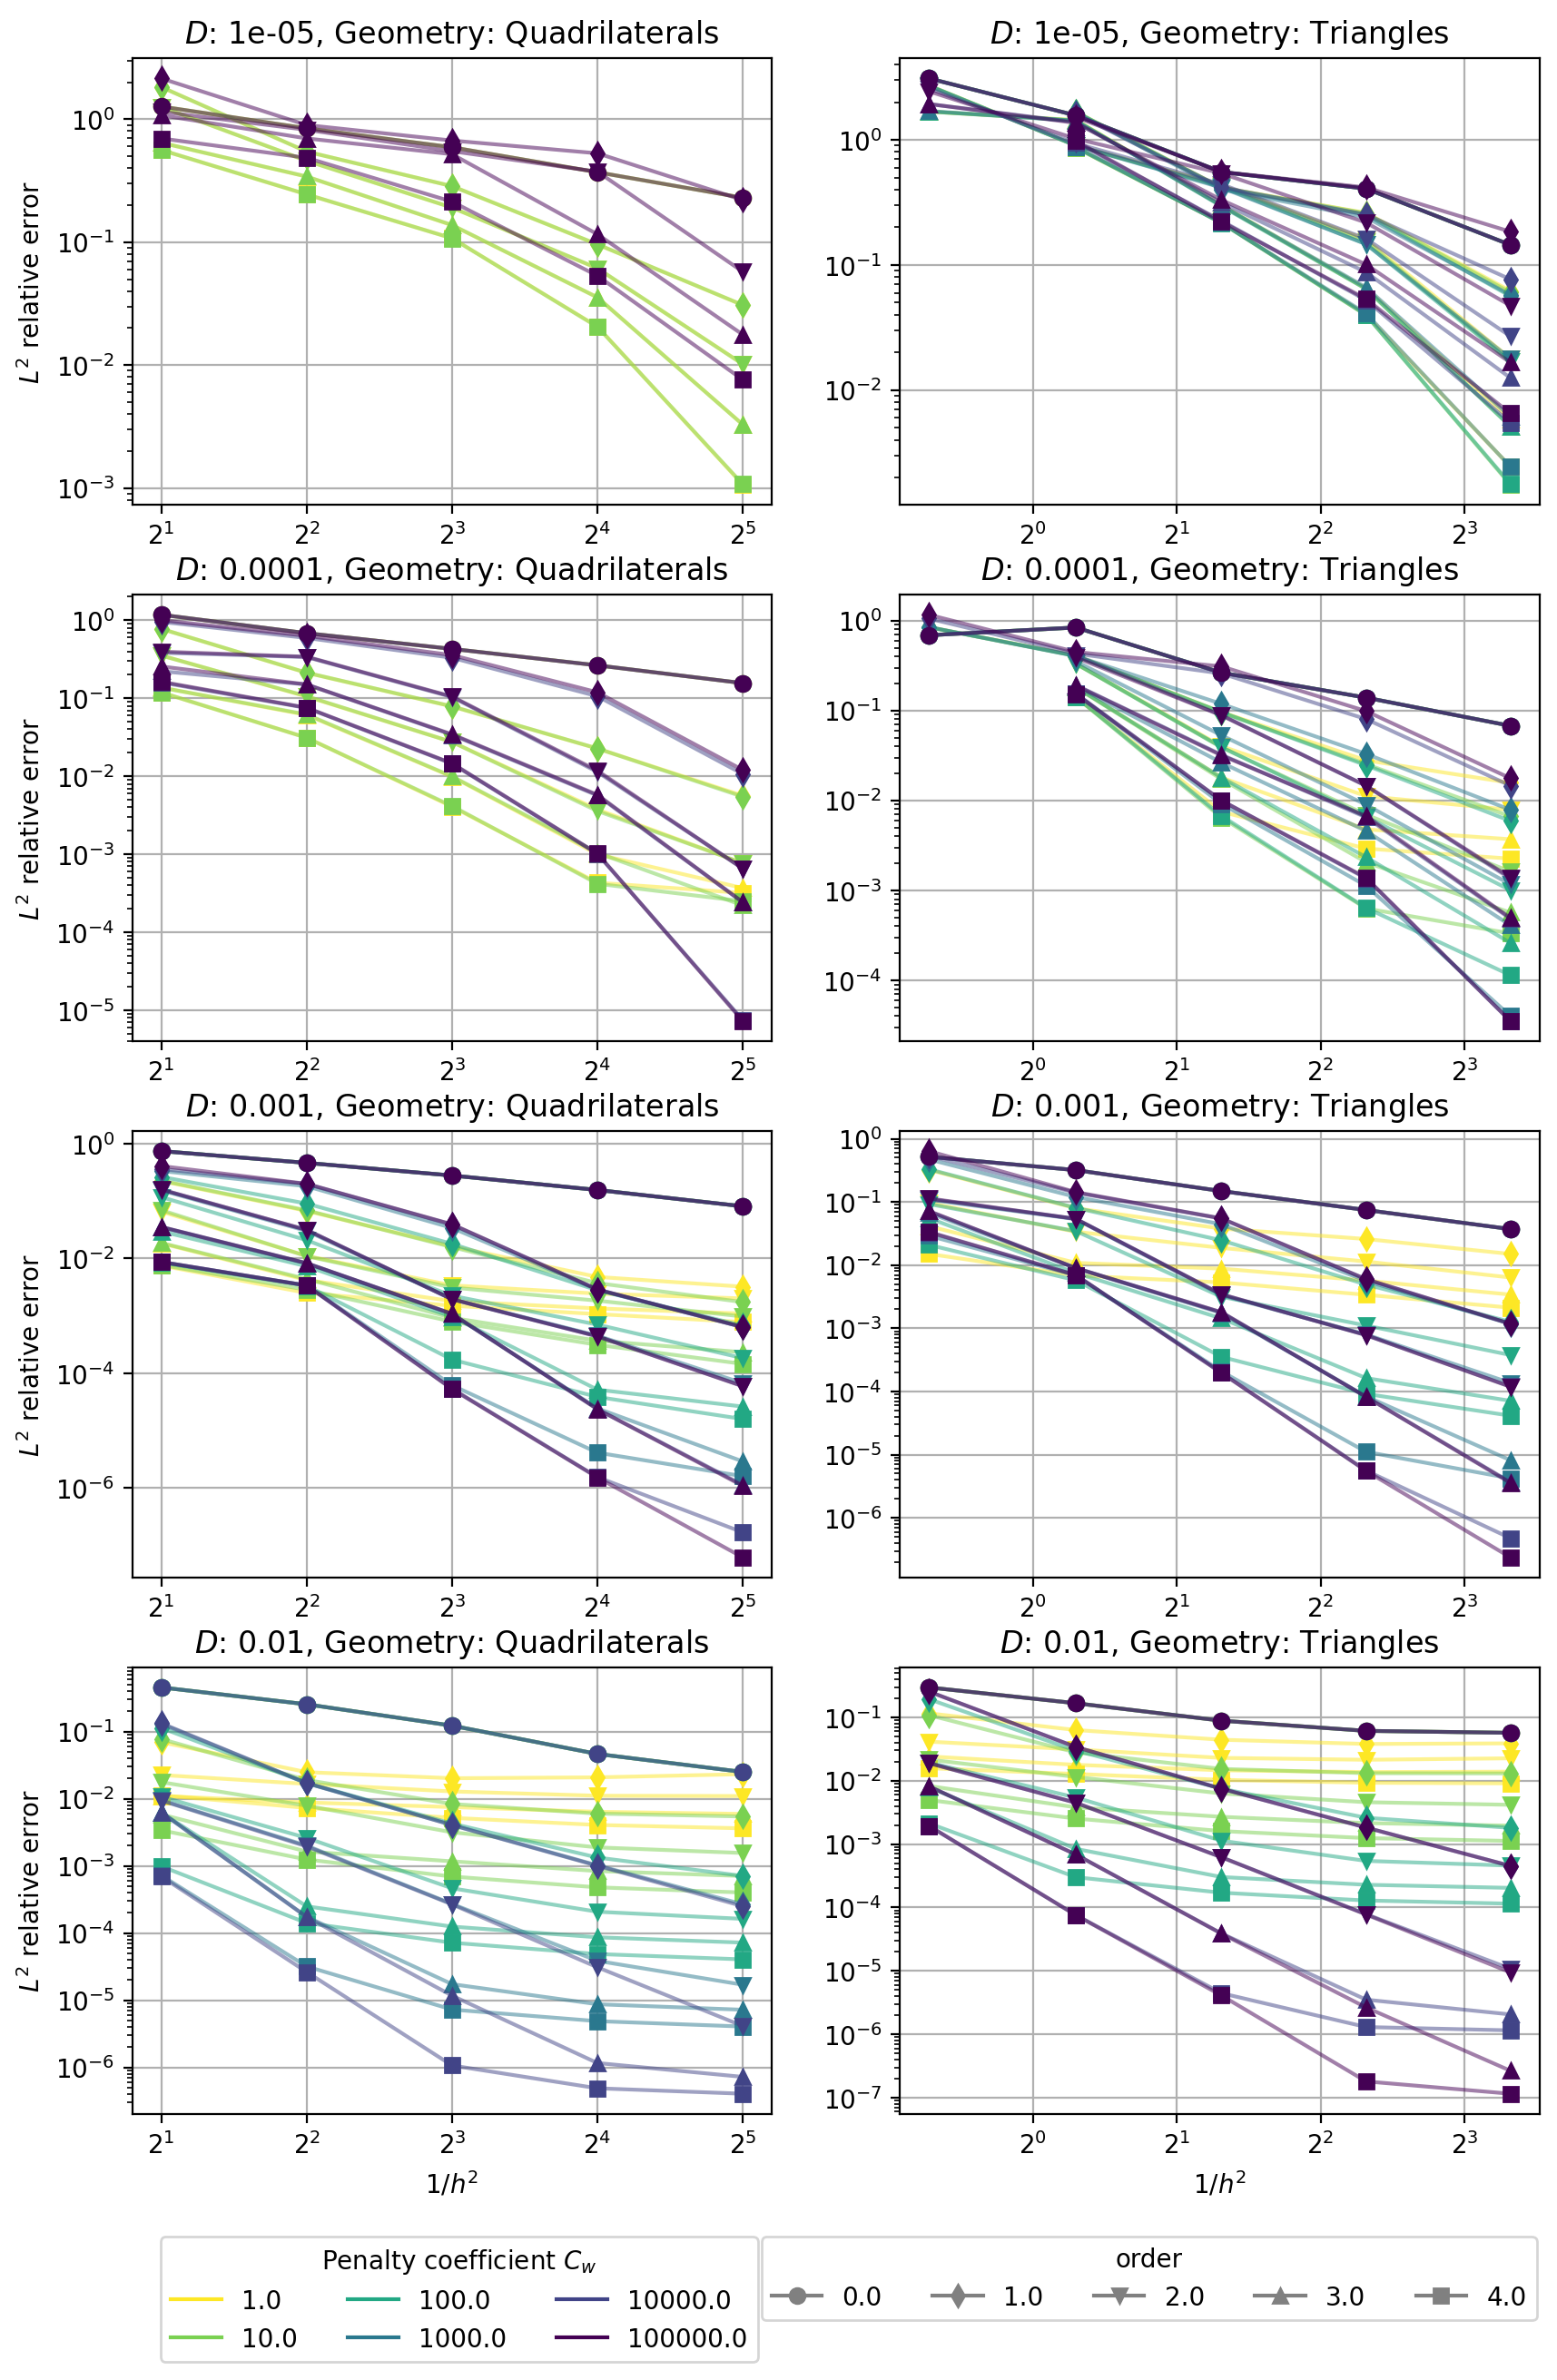

In [16]:
f = cp.plot_parametrized_var(df,
                   y_var="diff_l2", y_lab="$L^2$ relative error",
                   x_var="h-2", x_lab="$1/h^2$",
                   row_var="diffcoef", row_lab="$D$",
                   column_var="gel", column_lab="Geometry",
                   color_var="cw", color_lab="Penalty coefficient $C_w$",
                   alpha=.5,
                   figsize=(10, 15),
                   lines_leg_rect=[0.30, 0.07, 0.01, 0.01],
                   marks_leg_rect=[0.68, .07, 0.01, 0.01]
                   )

f.savefig("conv_plot.pdf")

## Burgers 2D aggregated

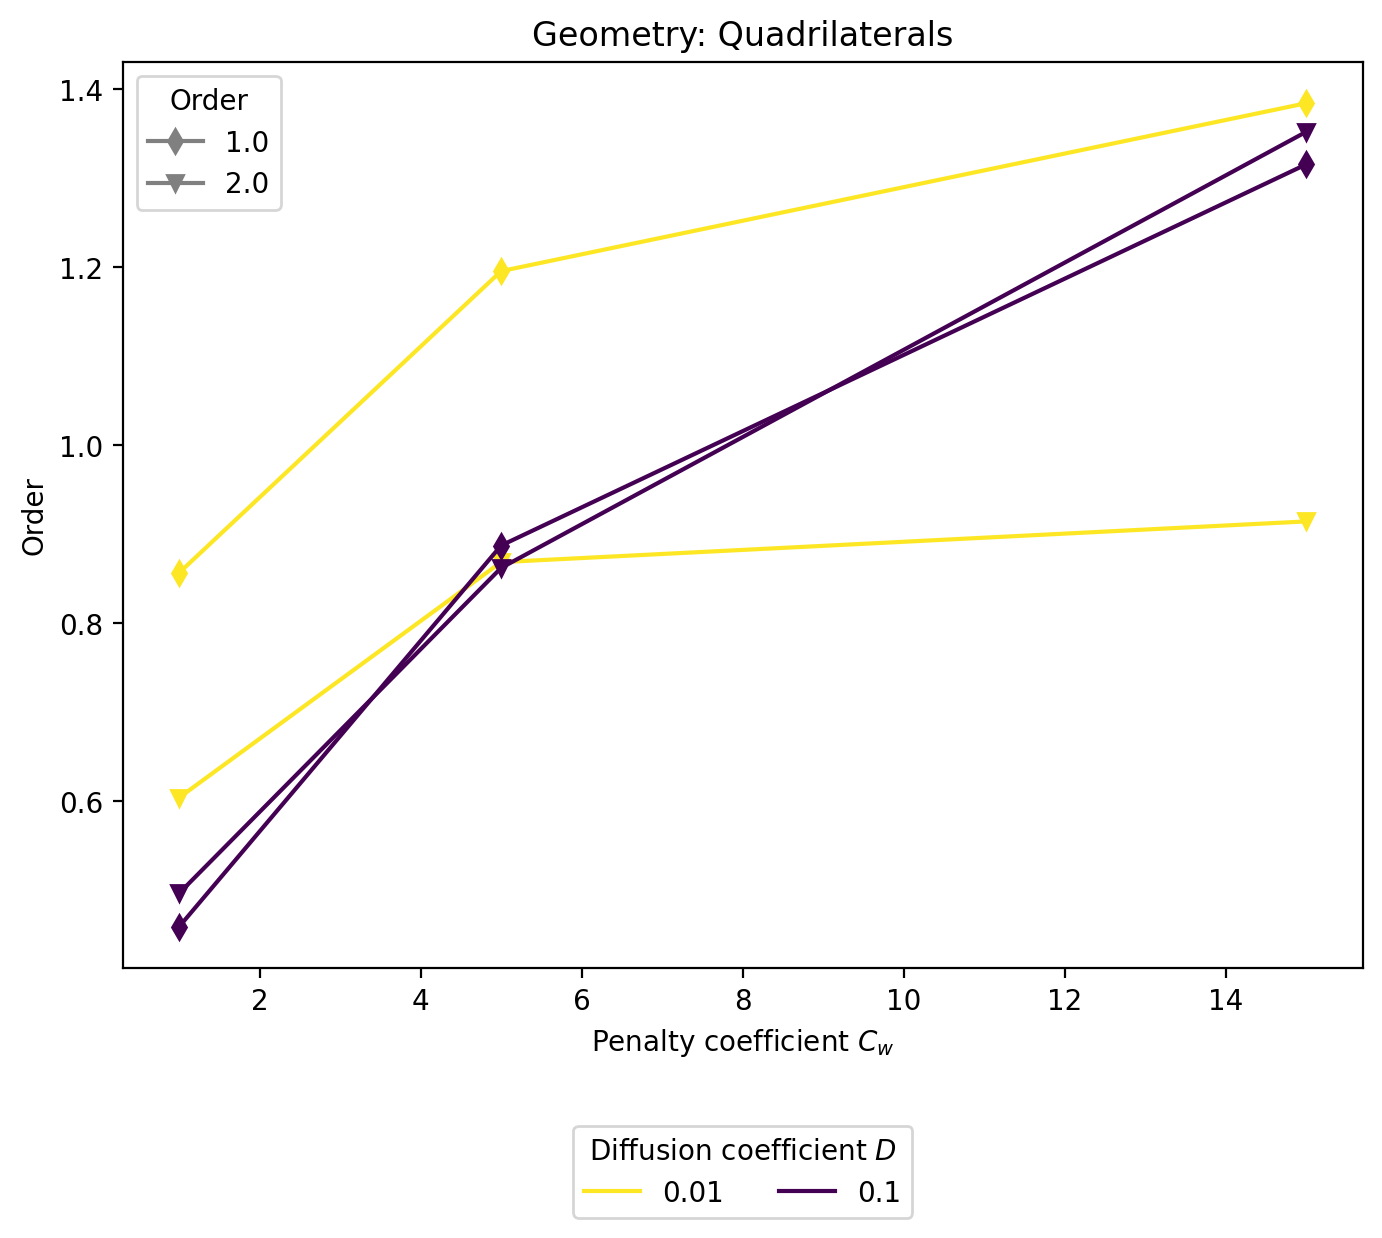

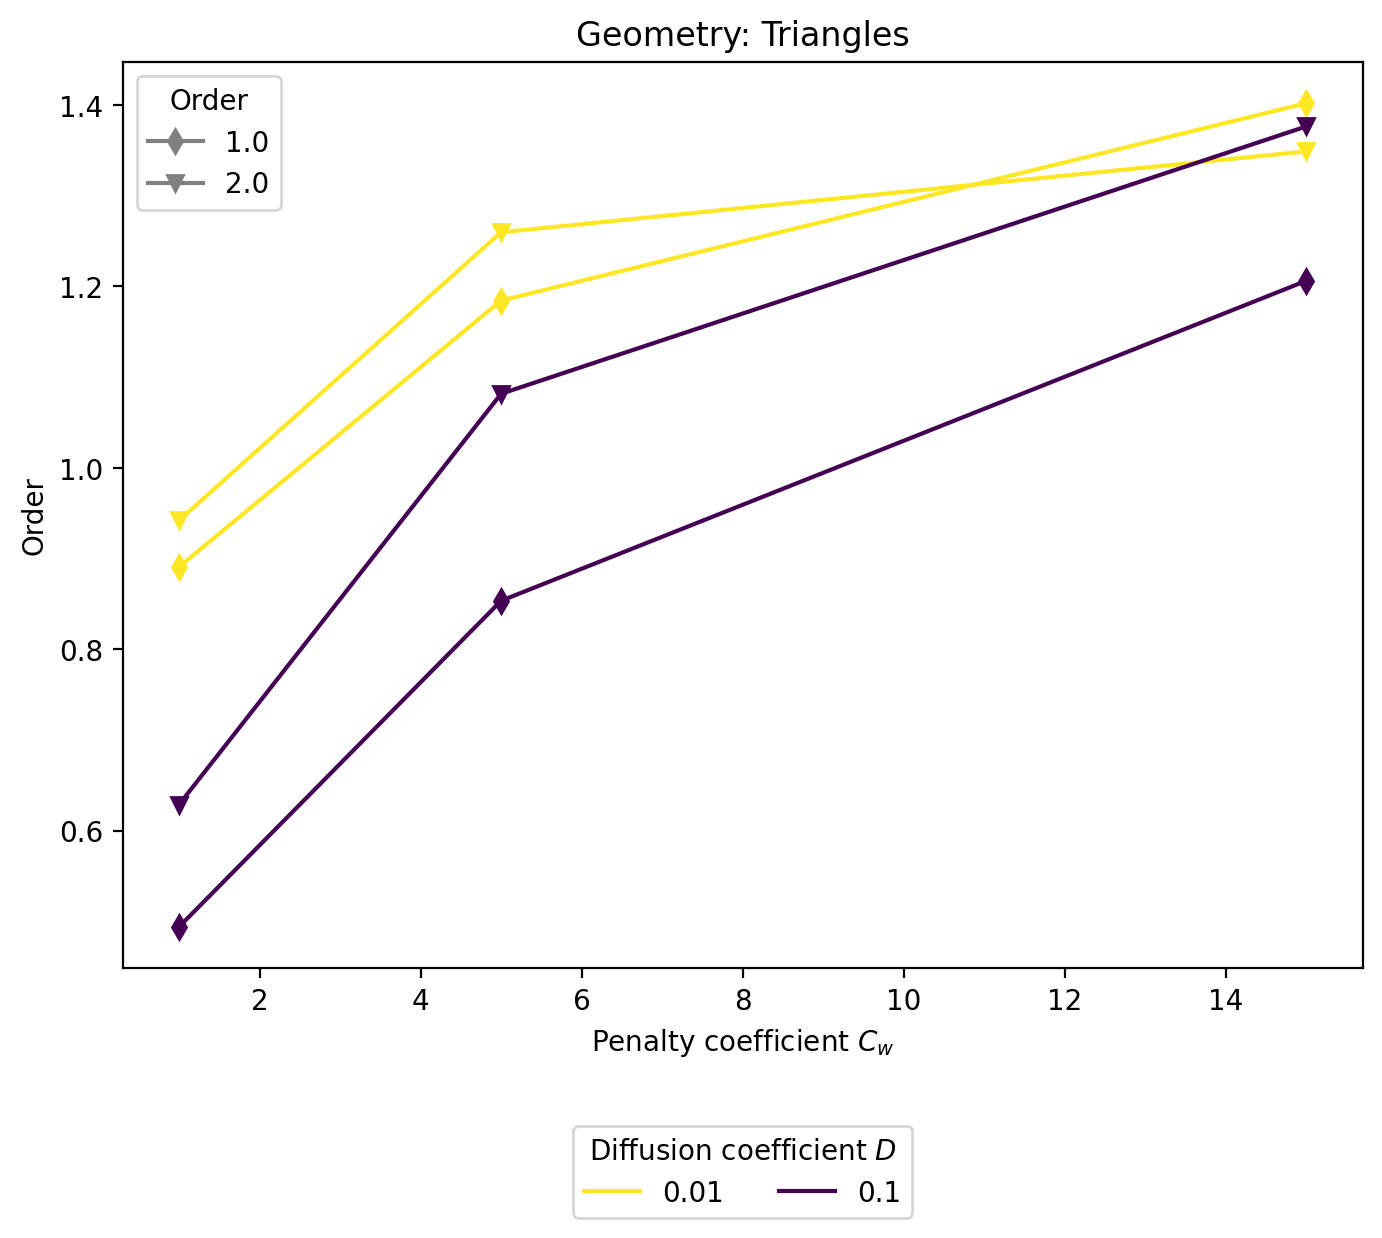

In [86]:
for gel in df["gel"].unique():
    fe = cp.plot_agregated_var(df[(df["gel"] == gel)],
                            y_var="num_order", y_lab="Order", ylogscale=False,
                            color_var="diffcoef", color_lab="Diffusion coefficient $D$",
                            x_var="cw",
                            x_lab="Penalty coefficient $C_w$",
                            xlogscale=False,
                            ax_title = f"Geometry: {gel}")

## Advection 1D

In [1]:
f = cp.plot_parametrized_var(df[(df["cfl"] == .1) & (df["adflux"] < 1)],
                   y_var="diff_l2", y_lab="$L^2$ relative error",
                   x_var="n_cells", x_lab="$1/h$",
                   row_var="limit", row_lab="Limiting",
                   column_var="cfl", column_lab="CFL",
                   color_var="adflux", color_lab="Flux $\\alpha$",
                   alpha=.5,
                   figsize=(9, 13),
                   lines_leg_rect=[0.2, 0.07, 0.01, 0.01],
                   marks_leg_rect=[0.55, .07, 0.01, 0.01]
                   )

NameError: name 'cp' is not defined

In [114]:
reload(cp)

<module 'convergence_plots' from 'C:\\Users\\tomas\\PycharmProjects\\Numerics\\dg_examples\\convergence_plots.py'>

## Burgers 1D

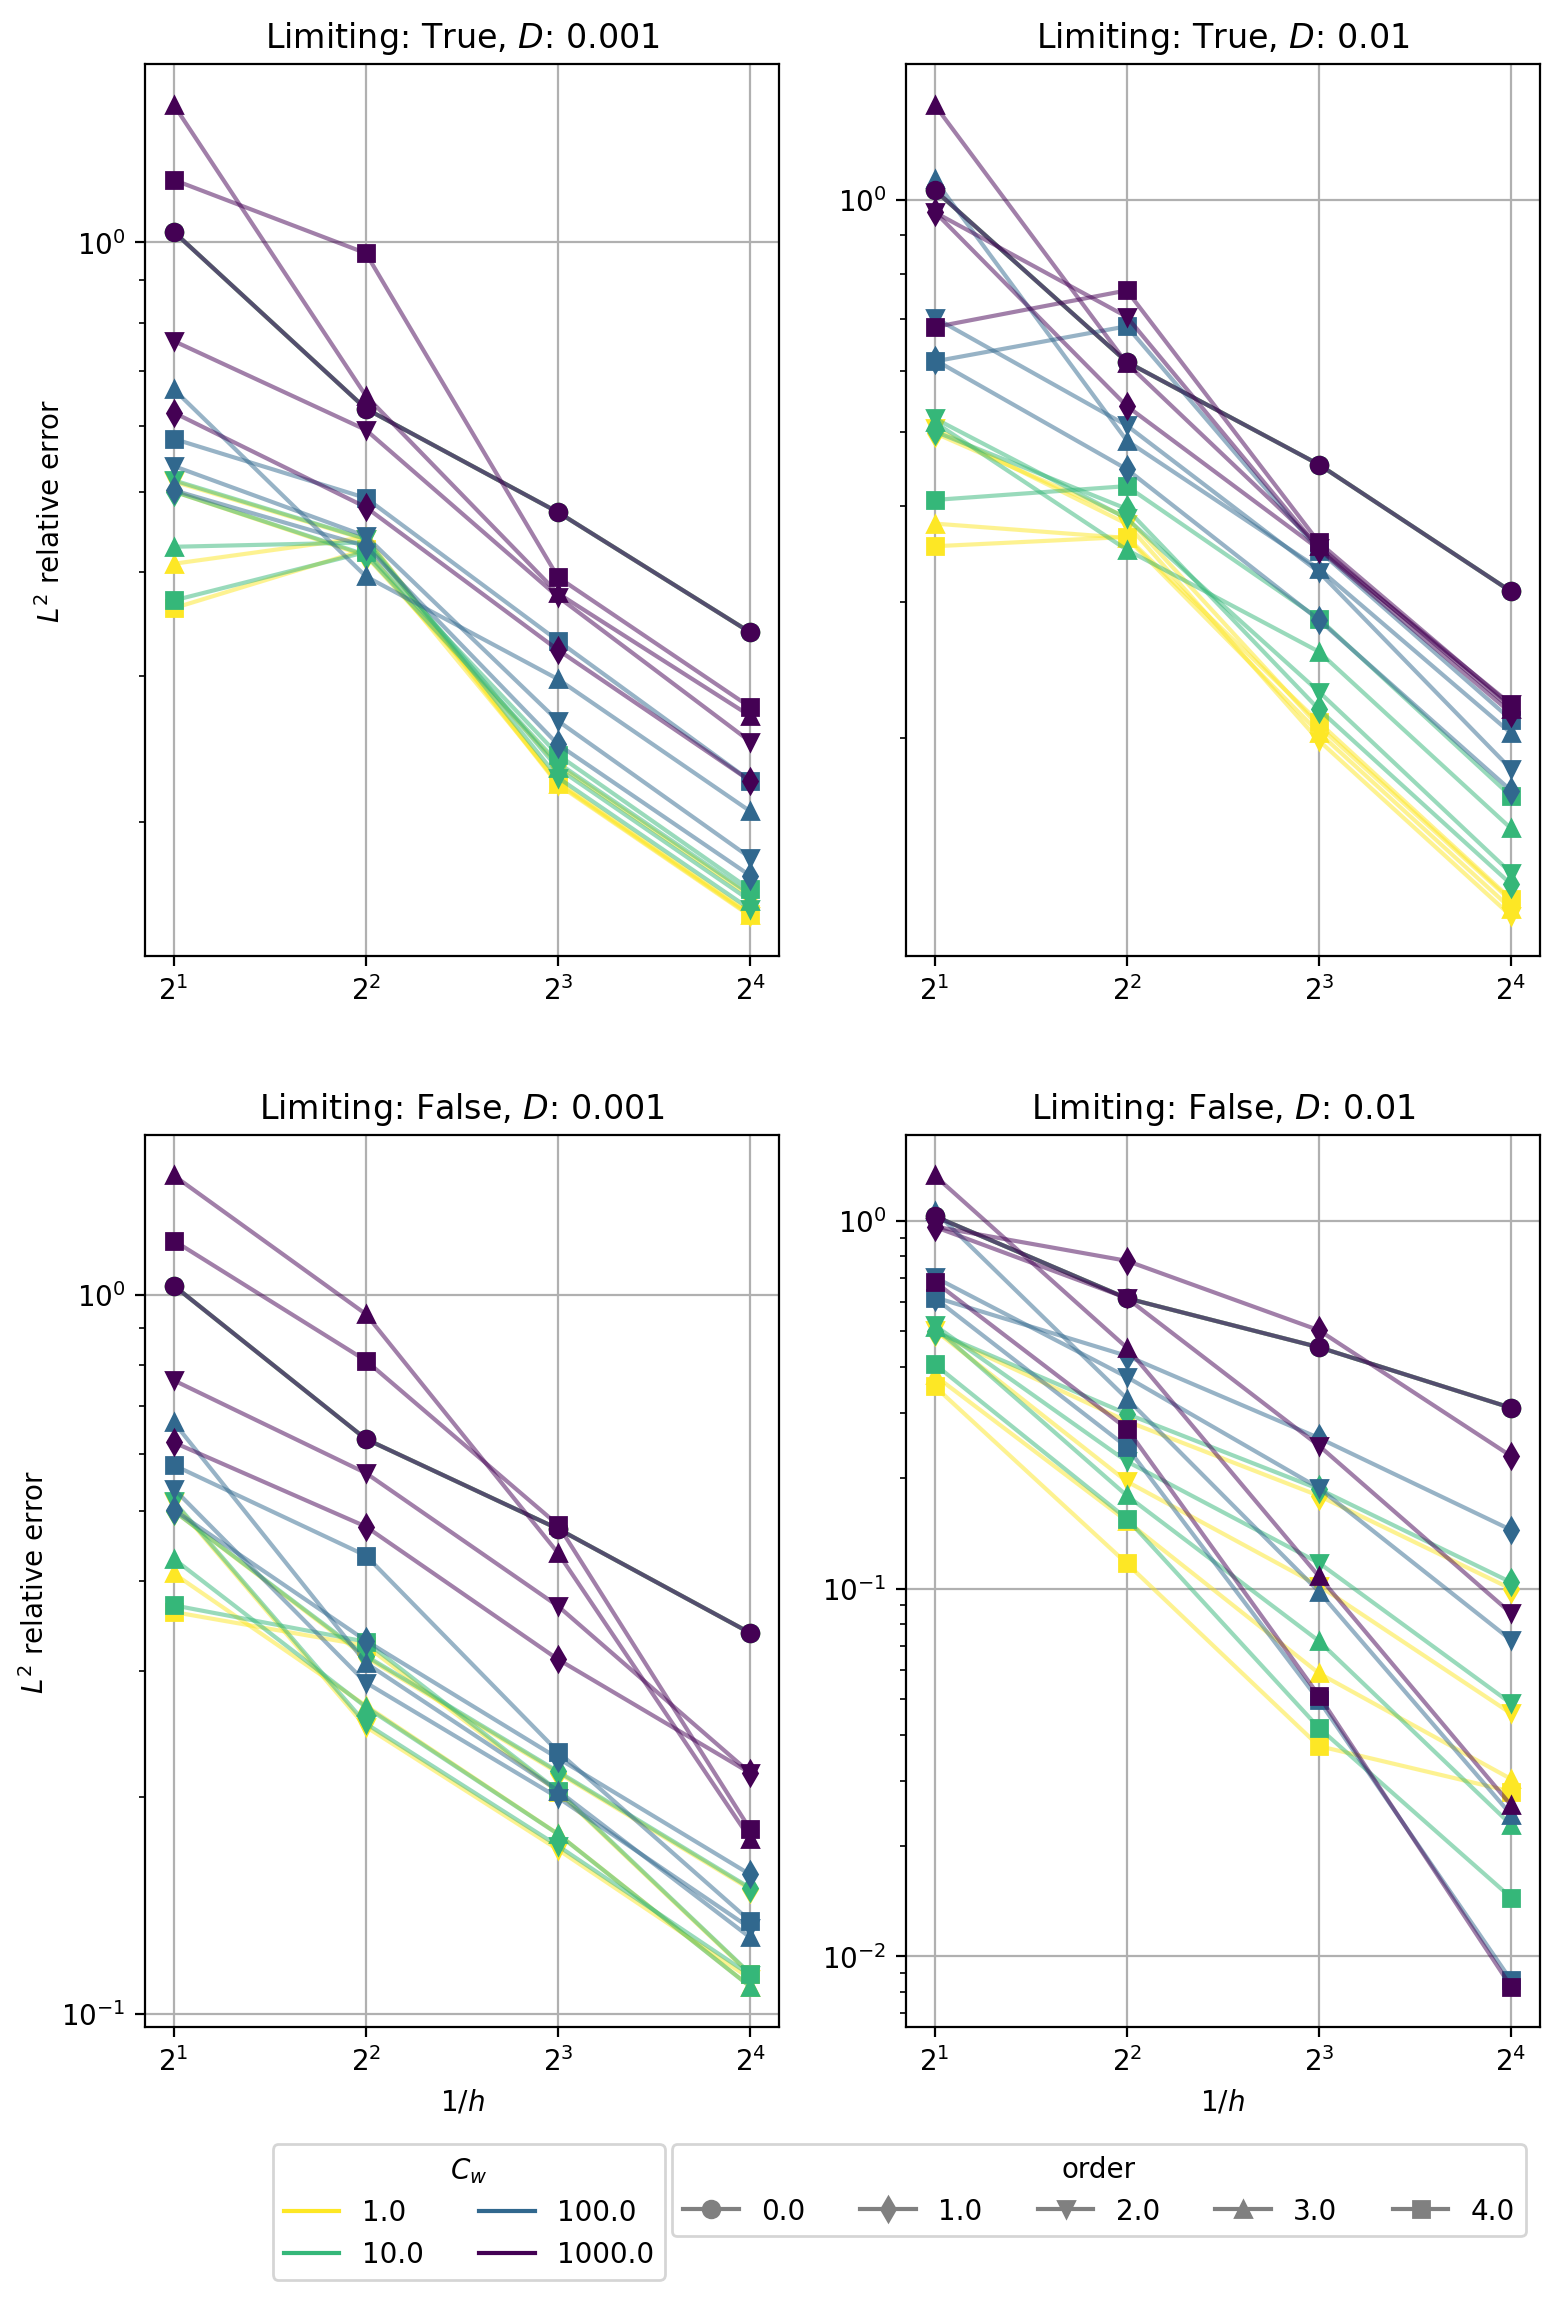

In [23]:
f = cp.plot_parametrized_var(
                   df[(df["cfl"] == 0.001) & (df["cw"] < 10e3)],
                   y_var="diff_l2", y_lab="$L^2$ relative error",
                   x_var="n_cells", x_lab="$1/h$",
                   row_var="limit", row_lab="Limiting",
                   column_var="diffcoef", column_lab="$D$",
                   color_var="cw", color_lab="$C_w$",
                   alpha=.5,
                   figsize=(9, 13),
                   lines_leg_rect=[0.3, 0.07, 0.01, 0.01],
                   marks_leg_rect=[0.65, .07, 0.01, 0.01],
                   lines_ncol=2
                   )

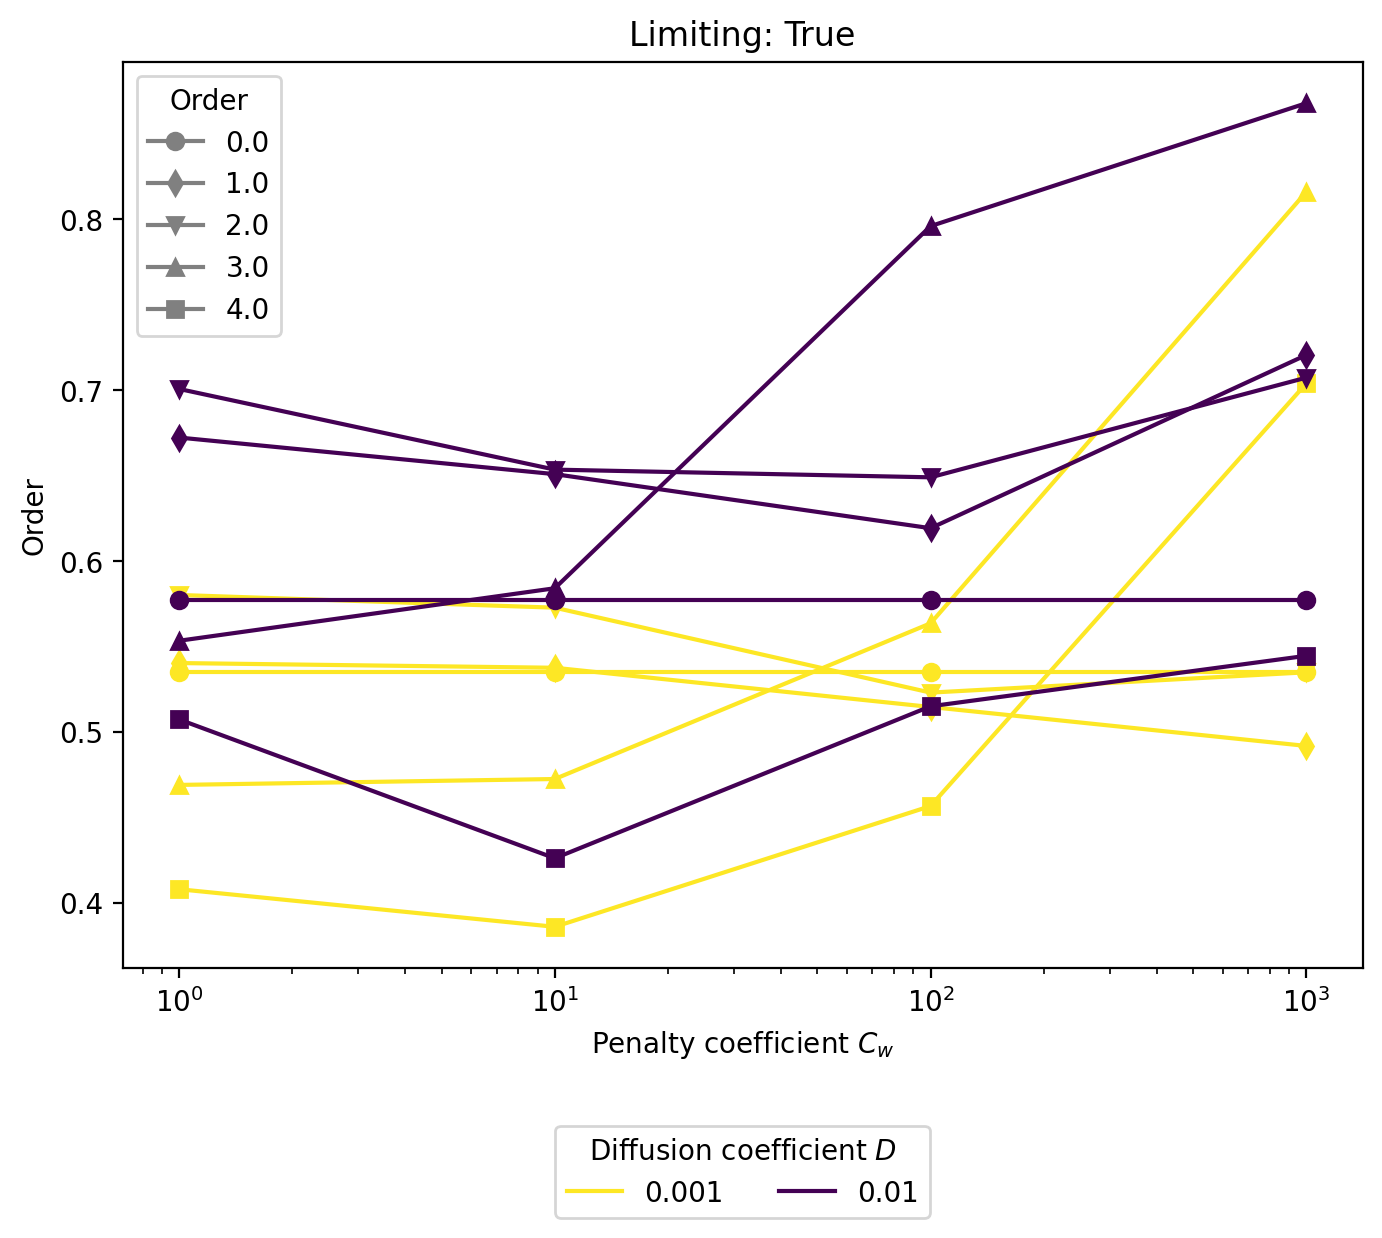

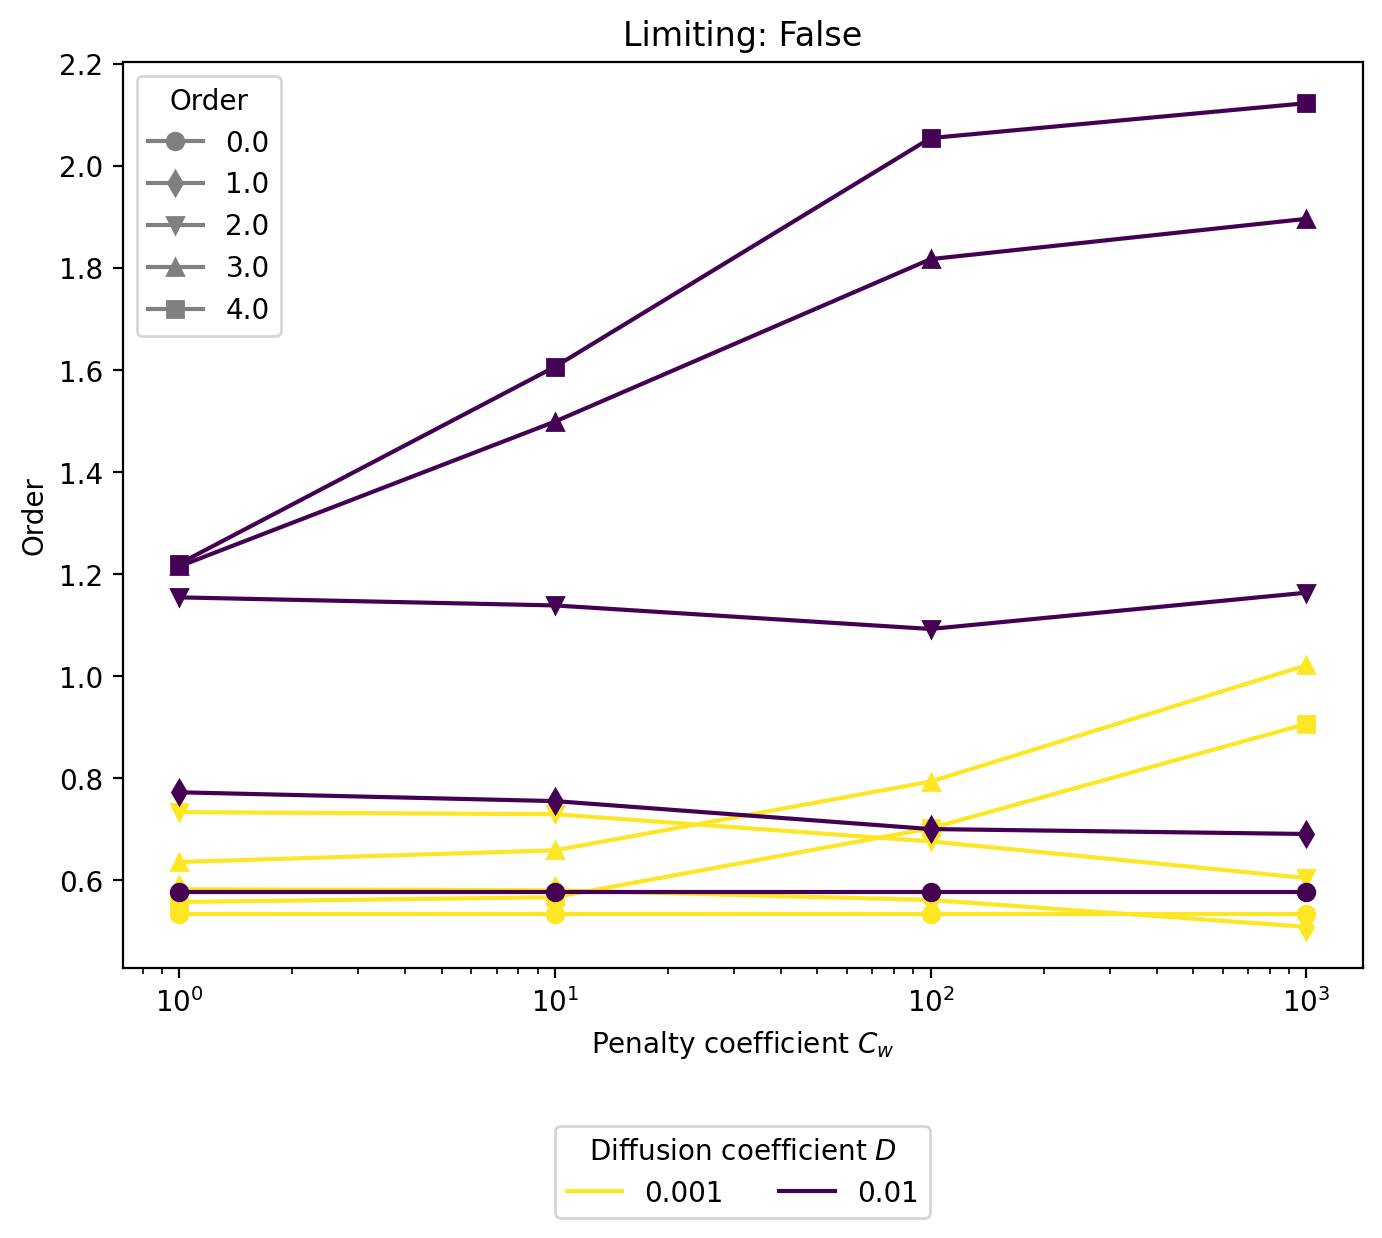

In [119]:
for lim in df["limit"].unique():
    fe = cp.plot_agregated_var(df[(df["cfl"] == 0.001) & (df["cw"] < 10e3) & (df["limit"] == lim)],
                                y_var="num_order", y_lab="Average rate", ylogscale=False,
                                color_var="diffcoef", color_lab="Diffusion coefficient $D$",
                                x_var="cw",
                                x_lab="Penalty coefficient $C_w$",
                                ax_title = f"Limiting: {lim}")

# 2D Limiter errors

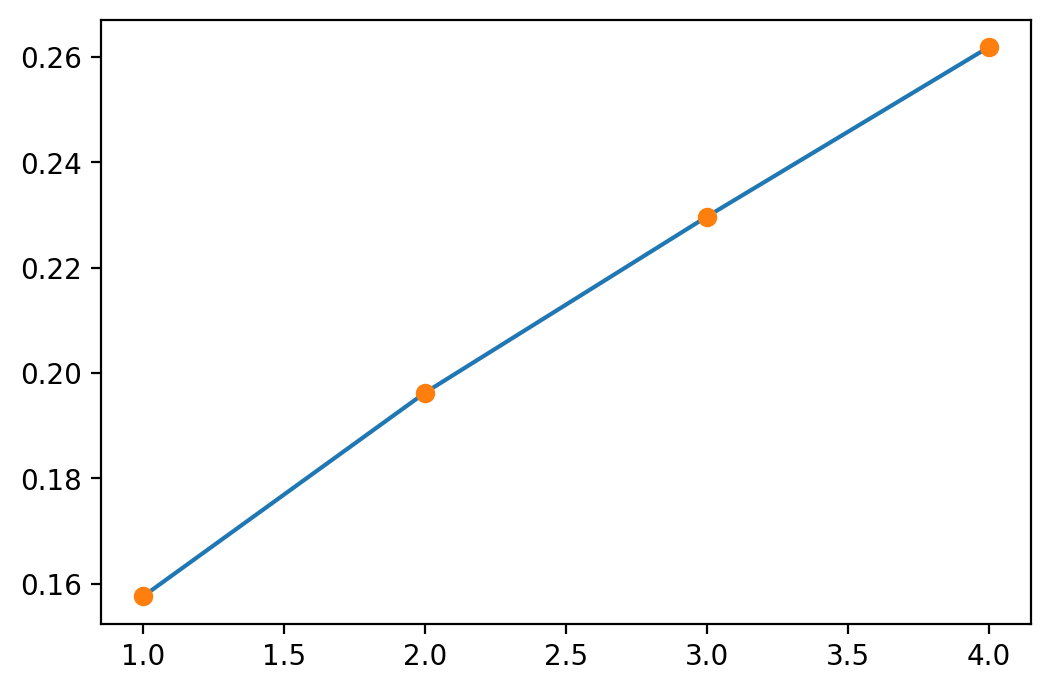

In [23]:
plt.plot(df["order"], df["diff_l2"])
plt.plot(df["order"], df["diff_l2"], 'o')